In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_csv("depression_anxiety_data.csv")

data

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True


In [3]:
data.dtypes


id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness           object
suicidal                 object
depression_diagnosis     object
depression_treatment     object
gad_score                 int64
anxiety_severity         object
anxiousness              object
anxiety_diagnosis        object
anxiety_treatment        object
epworth_score           float64
sleepiness               object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [5]:
data.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
gad_score               0
anxiety_severity        0
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64

In [7]:
data.shape

(783, 19)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(783, 19)

**Handling Missing Values**

-- Filling numerical columns with median, categorical columns with mode

In [11]:
data.update(data.select_dtypes(include=[np.number]).median())

# Fill categorical columns with mode
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])


In [12]:
data.isnull().sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

**Normalization - Encoding categorical variables**

In [13]:
label_encoders = {}
for col in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [14]:
data

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,1,33.333333,0,9,0,False,False,False,False,11,2,True,False,False,7.0,False
1,2,1,18,1,19.841270,3,8,0,False,False,False,False,5,1,False,False,False,14.0,True
2,3,1,19,1,25.102391,5,8,0,False,False,False,False,6,1,False,False,False,6.0,False
3,4,1,18,0,23.738662,3,19,2,True,True,False,False,15,4,True,False,False,11.0,True
4,5,1,18,1,25.617284,5,6,0,False,False,False,False,14,2,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,0,21.096191,3,6,0,False,False,False,False,1,3,False,False,False,3.0,False
779,780,4,22,1,25.308642,5,4,3,False,False,False,False,6,1,False,False,False,3.0,False
780,781,4,22,1,22.720438,3,2,3,False,False,False,False,5,1,False,False,False,4.0,False
781,782,4,22,0,23.033168,3,17,2,True,False,False,False,19,4,True,False,False,15.0,True


**Exploratory Data Analysis (EDA)**

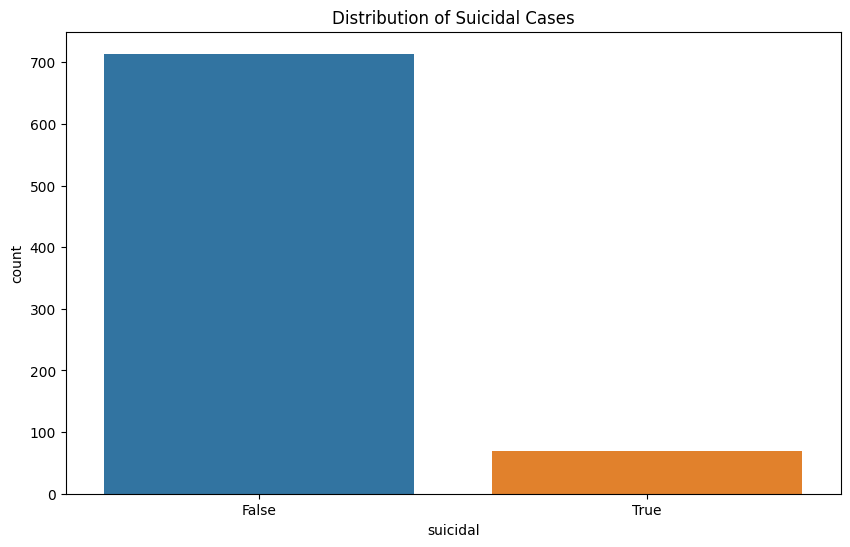

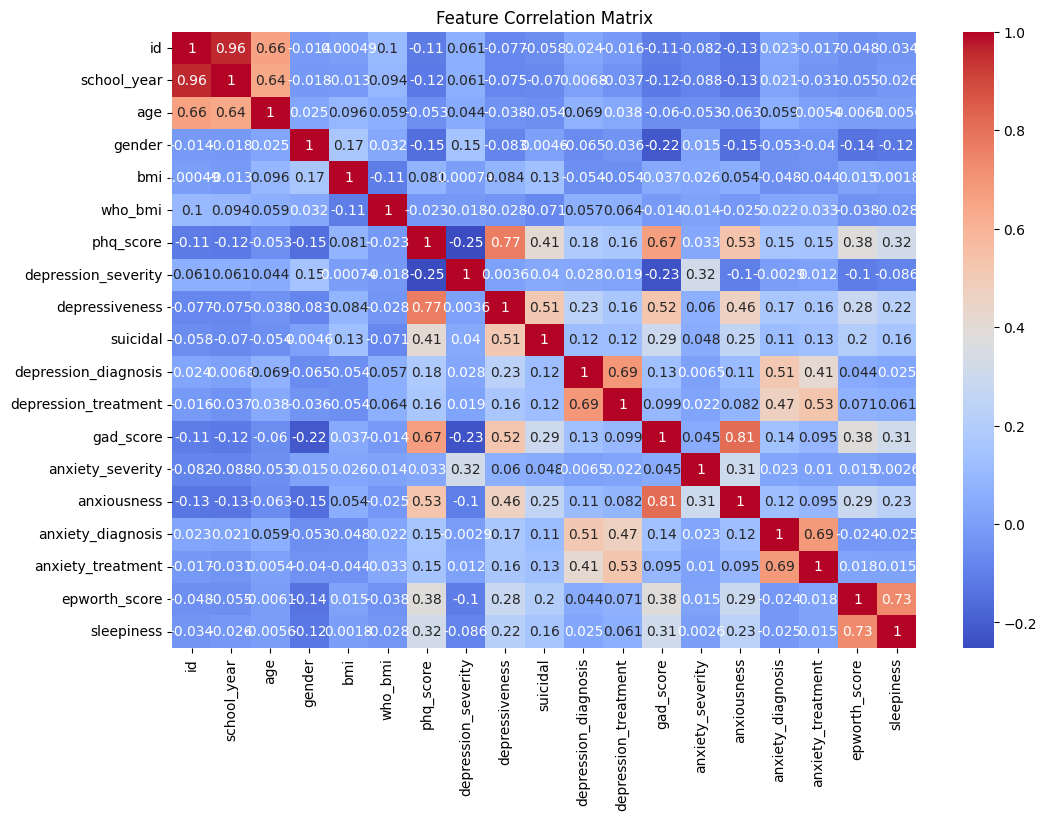

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='suicidal', data=data)
plt.title("Distribution of Suicidal Cases")
plt.show()

correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

**Feature Engineering**

In [16]:
X = data.drop(columns=['suicidal', 'id'])  # Dropping ID and target column
y = data['suicidal']

**Feature Selection (Using Random Forest Importance)**

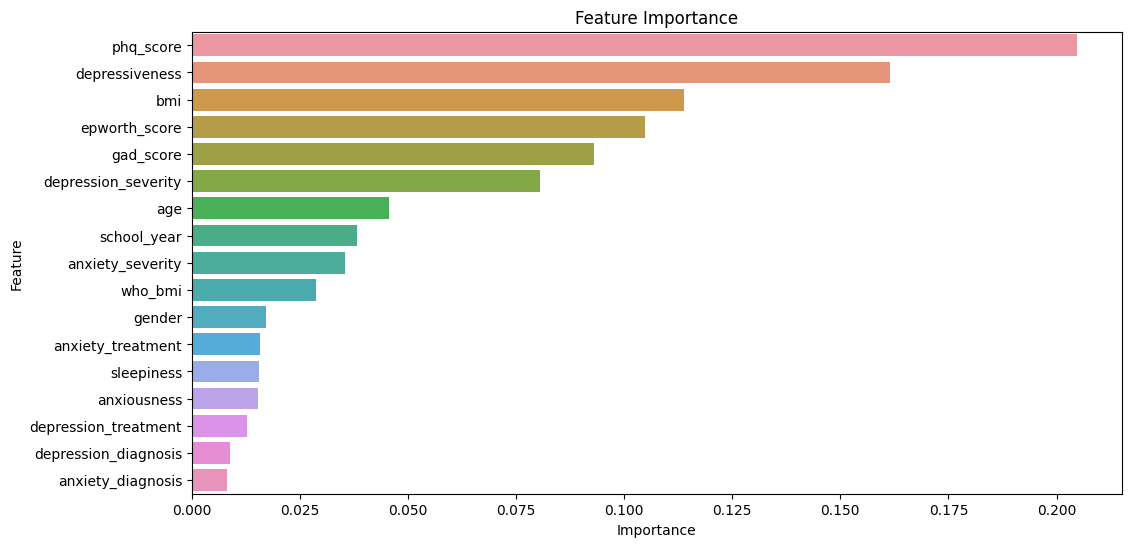

In [17]:
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

**Selecting top important features**

In [19]:
selected_features = feature_importances["Feature"].values[:10]
X = X[selected_features]

In [20]:
X

,phq_score,depressiveness,bmi,epworth_score,gad_score,depression_severity,age,school_year,anxiety_severity,who_bmi
0,9,False,33.333333,7.0,11,0,19,1,2,0
1,8,False,19.841270,14.0,5,0,18,1,1,3
2,8,False,25.102391,6.0,6,0,19,1,1,5
3,19,True,23.738662,11.0,15,2,18,1,4,3
4,6,False,25.617284,3.0,14,0,18,1,2,5
...,...,...,...,...,...,...,...,...,...,...
778,6,False,21.096191,3.0,1,0,24,4,3,3
779,4,False,25.308642,3.0,6,3,22,4,1,5
780,2,False,22.720438,4.0,5,3,22,4,1,3
781,17,True,23.033168,15.0,19,2,22,4,4,3


**Train-Test Split** 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Training and Evaluation**

In [23]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

Model: Random Forest
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       143
        True       0.82      0.64      0.72        14

    accuracy                           0.96       157
   macro avg       0.89      0.81      0.85       157
weighted avg       0.95      0.96      0.95       157

Accuracy: 0.9554

Model: XGBoost
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       143
        True       0.60      0.64      0.62        14

    accuracy                           0.93       157
   macro avg       0.78      0.80      0.79       157
weighted avg       0.93      0.93      0.93       157

Accuracy: 0.9299

